In [2]:
pip install pandas matplotlib seaborn scikit-learn
pip install pandas openpyxl
pip install requests pandas

In [ ]:
import pandas as pd
data=pd.read_csv("C:\\Users\\rsh47\\OneDrive\\바탕 화면\\data.csv")
data=data.drop(["기관분류","연번"],axis=1)

In [4]:
data.head(5)

,연령대,희망지역,희망직종,희망임금,장애유형,중증여부
0,20대,서울,사무 보조원,(시급)9620,지적장애,중증
1,30대,서울,의료 보조원(간호조무사 제외),(시급)9620,지적장애,중증
2,20대,서울,사무 보조원,(시급)9620,지적장애,중증
3,50대,서울,환경 미화원,(시급)9620,지적장애,중증
4,50대,경북,식품 분야 단순 종사원,(시급)9620,정신장애,중증


In [39]:
data.groupby("연령대").count()

,희망지역,희망직종,희망임금,장애유형,중증여부
연령대,,,,,
10대,1857,1857,1856,1857,1857
20대,11646,11646,11605,11646,11646
30대,6227,6227,6188,6227,6227
40대,5573,5573,5542,5573,5573
50대,6201,6201,6175,6201,6201
60대,6083,6083,6068,6083,6083
70대,1109,1109,1105,1109,1109
80대,80,80,80,80,80
90대,3,3,3,3,3


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.font_manager as fm

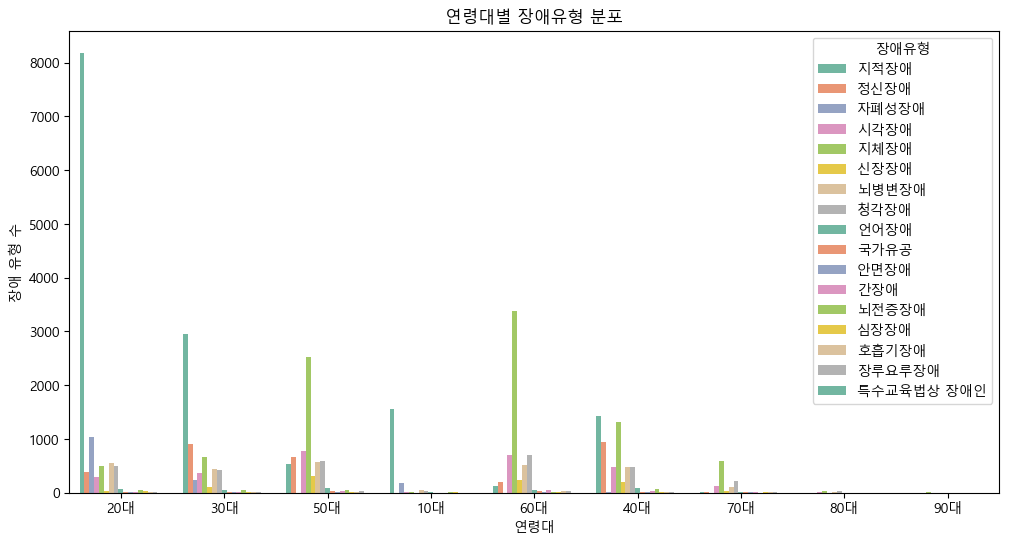

In [6]:
##data_1 = 연령대 및 장애유형별로
font_path='C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
data_1 = data[['연령대', '장애유형']]
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='연령대', hue='장애유형', palette='Set2')
plt.title('연령대별 장애유형 분포')
plt.xlabel('연령대')
plt.ylabel('장애 유형 수')
plt.legend(title='장애유형')
plt.show()

C:\Users\rsh47\anaconda3\envs\shryu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\rsh47\anaconda3\envs\shryu\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rsh47\anaconda3\envs\shryu\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

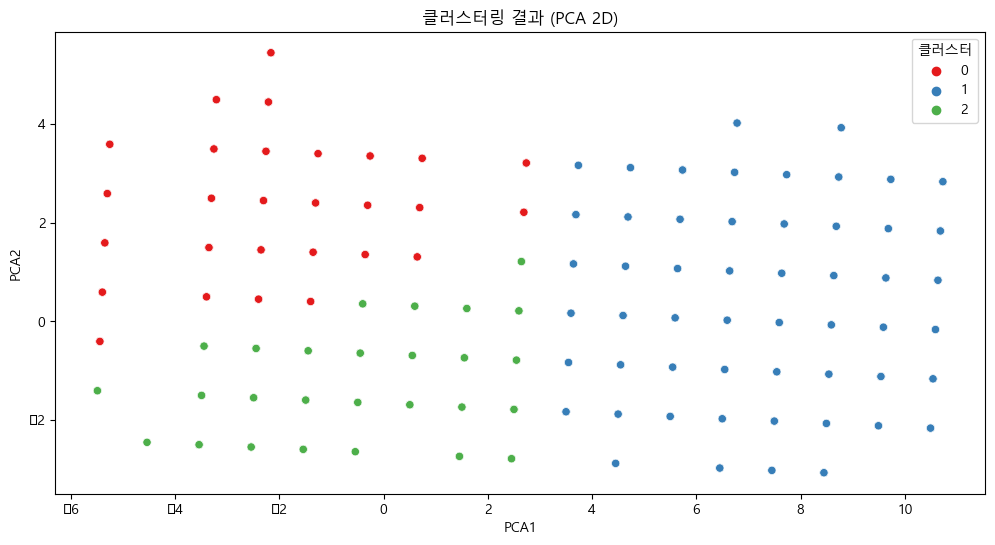

In [7]:
le = LabelEncoder()
data_encoded = data_1.apply(le.fit_transform)
kmeans = KMeans(n_clusters=3, random_state=42)
data_1['cluster'] = kmeans.fit_predict(data_encoded)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_encoded)
data_1['pca1'] = principal_components[:, 0]
data_1['pca2'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_1, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title('클러스터링 결과 (PCA 2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='클러스터')
plt.show()

# 1. 희망직종 텍스트 데이터 클러스터링 여기부터 시작

               희망직종  직종클러스터
0            사무 보조원      12
1  의료 보조원(간호조무사 제외)       1
2            사무 보조원      12
3            환경 미화원       4
4      식품 분야 단순 종사원      26
5      식품 분야 단순 종사원      26
6           배우 및 모델      20
7            제과·제빵원      10
8               세탁원      16
9           데스크 안내원      24


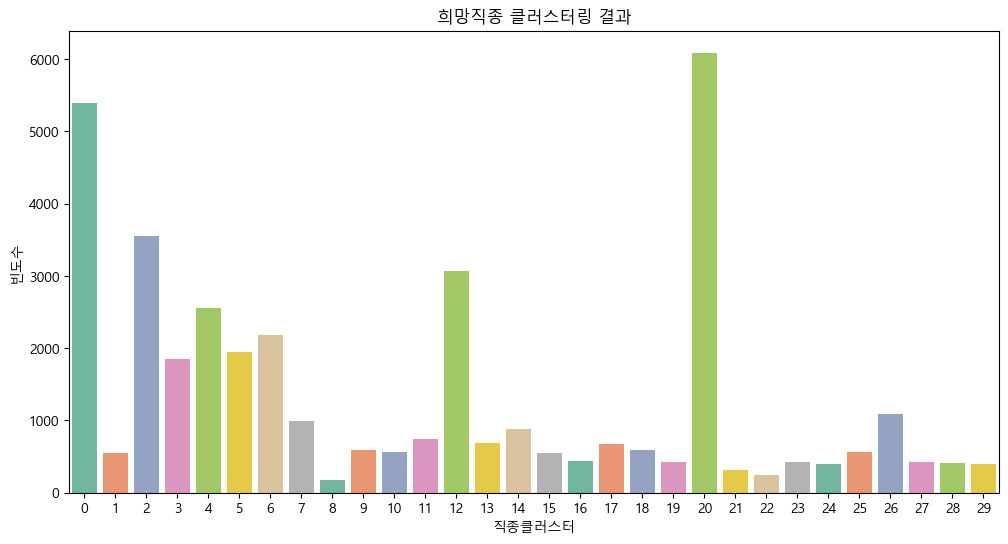

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv("C:\\Users\\rsh47\\OneDrive\\바탕 화면\\data.csv")

# # 한글 폰트 설정
# font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
# font_name = fm.FontProperties(fname=font_path).get_name()
# plt.rc('font', family=font_name)

# # 희망직종 열에 대해 텍스트 군집을 위해 벡터화
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(data['희망직종'])

# # K-Means 클러스터링 수행
# num_clusters = 30  # 원하는 클러스터 수를 지정하세요
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# data['직종클러스터'] = kmeans.fit_predict(tfidf_matrix)

# # 결과 확인
# print(data[['희망직종', '직종클러스터']].head(10))

# # 클러스터링 결과 시각화
# plt.figure(figsize=(12, 6))
# sns.countplot(data=data, x='직종클러스터', palette='Set2')
# plt.title('희망직종 클러스터링 결과')
# plt.xlabel('직종클러스터')
# plt.ylabel('빈도수')
# plt.show()


# 2. 구인현황 open API

In [3]:
import requests
import pandas as pd
import xml.etree.ElementTree as ET

# API URL과 인증키 설정
api_url = "https://apis.data.go.kr/B552583/job/job_list_env"
service_key = "8ceUBrlWkypObtB%252BFXjjPS3duVNwJqisssfI8IiQHRBuVgseNTMFggPr1eOshNs1lKDYXd9XciD5wR1PeiJh8w%253D%253D&pageNo=1&numOfRows=10000"

# API 요청 파라미터 설정
params = {
    'serviceKey': service_key,
    'pageNo': 1,
    'numOfRows': 10000,
}

# API 호출
response = requests.get(api_url, params=params)

# 응답 데이터 확인
if response.status_code == 200:
    print("API 호출 성공")
    response_content = response.content
else:
    print("API 호출 실패")
    response_content = None

# XML 파싱 및 데이터프레임 변환
if response_content:
    root = ET.fromstring(response_content)
    
    # 데이터를 저장할 리스트 초기화
    data1 = []

    # XML 데이터 파싱
    for item in root.findall(".//item"):
        row = {}
        for child in item:
            row[child.tag] = child.text
        data1.append(row)

    # 데이터프레임 생성
    df = pd.DataFrame(data1)

    # 데이터프레임 출력
    print(df)
else:
    print("데이터를 가져오지 못했습니다.")


API 호출 성공
             busplaName    cntctNo  \
0              (주)에스얜에스  1588-1519   
1           주식회사케이티희망지음  1588-1519   
2              주식회사네오위즈  1588-1519   
3           에스에이치피코퍼레이션  1588-1519   
4                양현고등학교  1588-1519   
..                  ...        ...   
216  사회복지법인 애광원 애광노인요양원  1588-1519   
217             (주)우수기업  1588-1519   
218            (주)서우리테일  1588-1519   
219         장애인보호작업장 금별  1588-1519   
220           （주）쓰리에스포유  1588-1519   

                                              compAddr empType enterType  \
0                        전라남도 나주시 왕곡면 혁신산단7길 105 (덕산리)     상용직        무관   
1                                경기도 과천시 새술막길 39 (중앙동)     상용직        무관   
2    경기도 성남시 분당구 대왕판교로645번길 14 네오위즈판교타워 (삼평동, 네오위즈판...     상용직        경력   
3        서울특별시 강남구 언주로30길 26 M1층 호텔신라 사무실 (도곡동, 타워팰리스)     계약직        무관   
4                             전라북도 전주시 덕진구 틀못2길 9 (장동)     상용직        무관   
..                                                 ...     ...       ...   
2

In [4]:
df.head(5)

,busplaName,cntctNo,compAddr,empType,enterType,envBothHands,envEyesight,envHandWork,envLiftPower,envLstnTalk,...,regagnName,reqCareer,reqEduc,rno,rnum,salary,salaryType,termDate,reqMajor,reqLicens
0,(주)에스얜에스,1588-1519,전라남도 나주시 왕곡면 혁신산단7길 105 (덕산리),상용직,무관,양손작업 가능,일상적 활동 가능,작은 물품 조립가능,5Kg 이내의 물건을 다룰 수 있음,간단한 듣고 말하기 가능,...,한국장애인고용공단 전남지사,무관,무관,1,1,"9,860",시급,2024-05-17~2024-06-14,NaN,NaN
1,주식회사케이티희망지음,1588-1519,경기도 과천시 새술막길 39 (중앙동),상용직,무관,NaN,NaN,NaN,NaN,NaN,...,한국장애인고용공단 경기서부지사,무관,무관,2,2,"1,030,370",월급,2024-05-17~2024-06-14,NaN,NaN
2,주식회사네오위즈,1588-1519,"경기도 성남시 분당구 대왕판교로645번길 14 네오위즈판교타워 (삼평동, 네오위즈판...",상용직,경력,양손작업 가능,일상적 활동 가능,NaN,5Kg 이내의 물건을 다룰 수 있음,듣고 말하기에 어려움 없음,...,한국장애인고용공단 경기동부지사,0년0개월,무관,3,3,"10,000",시급,2024-05-17~2024-06-30,NaN,NaN
3,에스에이치피코퍼레이션,1588-1519,"서울특별시 강남구 언주로30길 26 M1층 호텔신라 사무실 (도곡동, 타워팰리스)",계약직,무관,NaN,일상적 활동 가능,NaN,5Kg 이내의 물건을 다룰 수 있음,간단한 듣고 말하기 가능,...,한국장애인고용공단 서울동부지사,0년개월,무관,4,4,"12,190",시급,2024-05-17~2024-05-26,NaN,NaN
4,양현고등학교,1588-1519,전라북도 전주시 덕진구 틀못2길 9 (장동),상용직,무관,NaN,NaN,NaN,NaN,NaN,...,한국장애인고용공단 전북지사,무관,무관,5,5,"9,860",시급,2024-05-17~2024-05-27,NaN,NaN


In [33]:
#df.to_excel("C:\\Users\\rsh47\\OneDrive\\바탕 화면\\company_test3.xlsx")

# 3. 1차 전처리(지역, 희망직종 일부)

In [17]:
# regagnName열 전처리 함수
def preprocess_region_name(name):
    # '한국장애인고용공단 '을 제거
    name = name.replace('한국장애인고용공단 ', '')
    # '지사', '본부', '지역', '동부', '서부', '남부', '북부' 제거
    for term in ['지사', '본부', '지역', '동부', '서부', '남부', '북부']:
        name = name.replace(term, '')
    return name


# company_df의 regagnName 열 전처리, 음료조리사->바리스타로 변경
df['regagnName'] = df['regagnName'].apply(preprocess_region_name)
data['희망직종'] = data['희망직종'].replace('음료 조리사', '바리스타')


,busplaName,cntctNo,compAddr,empType,enterType,envBothHands,envEyesight,envHandWork,envLiftPower,envLstnTalk,...,reqCareer,reqEduc,rno,rnum,salary,salaryType,termDate,reqMajor,reqLicens,직종클러스터
0,(주)에스얜에스,1588-1519,전라남도 나주시 왕곡면 혁신산단7길 105 (덕산리),상용직,무관,양손작업 가능,일상적 활동 가능,작은 물품 조립가능,5Kg 이내의 물건을 다룰 수 있음,간단한 듣고 말하기 가능,...,무관,무관,1,1,"9,860",시급,2024-05-17~2024-06-14,NaN,NaN,26
1,주식회사케이티희망지음,1588-1519,경기도 과천시 새술막길 39 (중앙동),상용직,무관,NaN,NaN,NaN,NaN,NaN,...,무관,무관,2,2,"1,030,370",월급,2024-05-17~2024-06-14,NaN,NaN,0
2,주식회사네오위즈,1588-1519,"경기도 성남시 분당구 대왕판교로645번길 14 네오위즈판교타워 (삼평동, 네오위즈판...",상용직,경력,양손작업 가능,일상적 활동 가능,NaN,5Kg 이내의 물건을 다룰 수 있음,듣고 말하기에 어려움 없음,...,0년0개월,무관,3,3,"10,000",시급,2024-05-17~2024-06-30,NaN,NaN,0
3,에스에이치피코퍼레이션,1588-1519,"서울특별시 강남구 언주로30길 26 M1층 호텔신라 사무실 (도곡동, 타워팰리스)",계약직,무관,NaN,일상적 활동 가능,NaN,5Kg 이내의 물건을 다룰 수 있음,간단한 듣고 말하기 가능,...,0년개월,무관,4,4,"12,190",시급,2024-05-17~2024-05-26,NaN,NaN,11
4,양현고등학교,1588-1519,전라북도 전주시 덕진구 틀못2길 9 (장동),상용직,무관,NaN,NaN,NaN,NaN,NaN,...,무관,무관,5,5,"9,860",시급,2024-05-17~2024-05-27,NaN,NaN,0


# 4. 직종 병합하여 텍스트 클러스터링 후 추가

In [18]:
# 희망직종과 jobNm을 합친 후 클러스터링
all_jobs = pd.concat([data['희망직종'], df['jobNm']])

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(all_jobs)

# K-Means 클러스터링
num_clusters = 50  # 적절한 클러스터 수를 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# 클러스터 라벨 추가
data['직종클러스터'] = kmeans.predict(tfidf_vectorizer.transform(data['희망직종']))
df['직종클러스터'] = kmeans.predict(tfidf_vectorizer.transform(df['jobNm']))

# 클러스터링 결과 확인
df.head(), data.head()

(    busplaName    cntctNo                                           compAddr  \
 0     (주)에스얜에스  1588-1519                      전라남도 나주시 왕곡면 혁신산단7길 105 (덕산리)   
 1  주식회사케이티희망지음  1588-1519                              경기도 과천시 새술막길 39 (중앙동)   
 2     주식회사네오위즈  1588-1519  경기도 성남시 분당구 대왕판교로645번길 14 네오위즈판교타워 (삼평동, 네오위즈판...   
 3  에스에이치피코퍼레이션  1588-1519      서울특별시 강남구 언주로30길 26 M1층 호텔신라 사무실 (도곡동, 타워팰리스)   
 4       양현고등학교  1588-1519                           전라북도 전주시 덕진구 틀못2길 9 (장동)   
 
   empType enterType envBothHands envEyesight envHandWork         envLiftPower  \
 0     상용직        무관      양손작업 가능   일상적 활동 가능  작은 물품 조립가능  5Kg 이내의 물건을 다룰 수 있음   
 1     상용직        무관          NaN         NaN         NaN                  NaN   
 2     상용직        경력      양손작업 가능   일상적 활동 가능         NaN  5Kg 이내의 물건을 다룰 수 있음   
 3     계약직        무관          NaN   일상적 활동 가능         NaN  5Kg 이내의 물건을 다룰 수 있음   
 4     상용직        무관          NaN         NaN         NaN                  NaN   
 
       envLstnTalk

In [19]:
df.to_excel("C:\\Users\\rsh47\\OneDrive\\바탕 화면\\company_test6.xlsx")
data.to_excel("C:\\Users\\rsh47\\OneDrive\\바탕 화면\\people_test6.xlsx")

In [1]:
import pandas as pd

In [4]:
df2_path = 'first_dataprocessing.xlsx'  # 구직
company_path = 'company_pre.xlsx'  # 구인

data = pd.read_excel(df2_path)
df = pd.read_excel(company_path)

data['직종클러스터'].unique()

array([12,  1,  4, 26, 20, 10, 16, 24,  5,  2,  0, 25, 19, 15, 29, 18, 17,
        3, 13, 28, 14,  7, 27, 11, 23, 21,  6,  8,  9, 22], dtype=int64)

In [11]:
asd=sorted(data['직종클러스터'])
print(asd)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:
import pandas as pd

# 예시 데이터프레임 생성
data = {'A': [1, 2, 3, 2, 4],
        'B': ['가', '나', '다', '가', '라']}
df = pd.DataFrame(data)

# 특정 열에서 중복된 행 찾기
duplicates_in_column_A = df[df.duplicated(subset='A', keep=False)]
print(duplicates_in_column_A)

   A  B
1  2  나
3  2  가


In [13]:
data

{'A': [1, 2, 3, 2, 4], 'B': ['가', '나', '다', '가', '라']}